In [1]:
!python -m pip install kagglehub



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)



c:\Users\elbgr\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\elbgr\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [3]:
import os

# Mostrar los archivos descargados
print("Contenido del dataset:")
print(os.listdir(path))


Contenido del dataset:
['amz_uk_price_prediction_dataset.csv']


In [4]:
import pandas as pd

df = pd.read_csv(f"{path}/amz_uk_price_prediction_dataset.csv")
print(df.head())


   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [5]:
#INITIAL EXPLORATION OF THE DATASET:

# Retrieving the number of rows and columns in the dataframe
print(df.shape)

# Displaying the data types of each column in the dataframe
print(df.dtypes)

# Display the first few rows of the dataset
df.head()

(2443651, 9)
uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


# Exploring numerical and categorical variables

In [6]:


df_numerical=df.select_dtypes("number")
df_object=df.select_dtypes("object")

# Extracting column names with numerical data types from the dataframe
print(df_numerical.columns)
print(df_object.columns)

# Counting and sorting the unique values for each numerical column in descending order
print(df_numerical.nunique().sort_values(ascending=False))
# stars is categorical because is a rating 
print(df.select_dtypes("object").nunique().sort_values(ascending=False))

#category is categorical 

#there is only 1 column left 'isbestseller' that is a boolean




Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')
Index(['asin', 'title', 'category'], dtype='object')
uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64
asin        2222742
title       2077591
category        296
dtype: int64


# Data Cleaning

In [7]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [8]:
# Identifying columns in the dataframe where over 80% of the values are missing
df.columns[df.isnull().mean() > 0.8]

Index([], dtype='object')

In [9]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df = df[df.columns[df.isnull().mean() < 0.8]]

In [10]:
# Removing the "Id" column from the dataframe
df.drop("uid", inplace=True, axis=1)

# Univariate Analysis

## Part 1: Understanding Product Categories

*Business Question:* What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

**Frequency Tables:**

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

**Visualizations:**

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [11]:
#Frequency tables:

frequency_category = df['category'].value_counts()

frequency_category_top5=frequency_category.head(5)

print(frequency_category_top5)



category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


C:\Users\elbgr\AppData\Local\Temp\ipykernel_28736\2570997387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_category_top5.index, y=frequency_category_top5.values, palette="Set3")


<Axes: xlabel='category'>

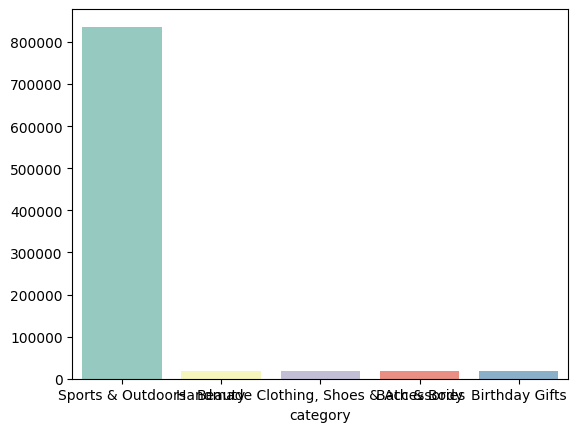

In [12]:
#Visualizations:
import matplotlib.pyplot as plt  
import seaborn as sns
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_category_top5.index, y=frequency_category_top5.values, palette="Set3")


## Part 2: Delving into Product Pricing
*Business Question:* How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**Measures of Centrality:**

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

**Measures of Dispersion:**

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

**Visualizations:**

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [20]:
#Measures of Centrality:

mean_price =df["price"].mean()
print(mean_price)

median_price = df["price"].median()
print(median_price)

mode_price=df["price"].mode()
print(mode_price)

skewness_rating=df['price'].skew()

print(skewness_rating)

#The average price point of the products is about $89.24, but the most common price (mode) is $9.99, and the median is $19.09.
#This means that while a few expensive products push the average up, most items are actually much cheaper.
#The data is therefore right-skewed — there are many low-priced products and a few high-priced outliers that increase the mean.

89.24380943923661
19.09
0    9.99
Name: price, dtype: float64
27.49297756628037


In [24]:
#Measures of Dispersion:
variance_price=variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

dispersion=[variance_price,std_dev_price, min_price, max_price, range_price,quantiles_price]
for a in dispersion:
    print(a)

#the range is 100000 so that indicates that the product prices are extreamly spread

119445.48532254901
345.60886175349873
0.0
100000.0
100000.0
0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


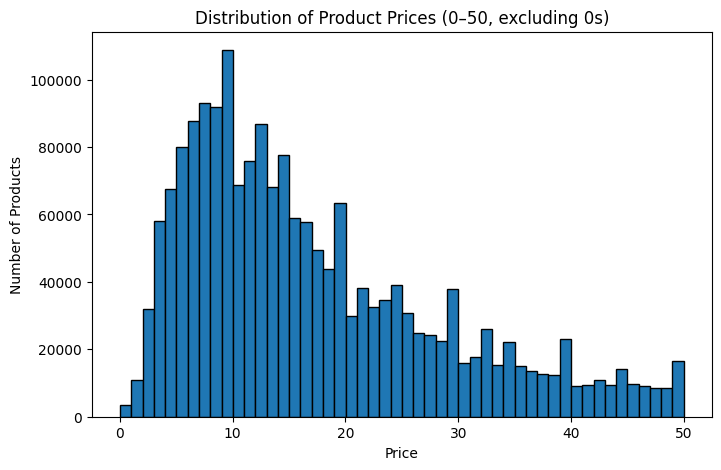

In [15]:
#Visualizations
plt.figure(figsize=(8,5))
plt.hist(df[(df['price'] > 0) & (df['price'] <= 50)]['price'], bins=50, edgecolor='black')
plt.title('Distribution of Product Prices (0–50, excluding 0s)')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()

## Part 3: Unpacking Product Ratings

*Business Question:* How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**Measures of Centrality:**

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

**Measures of Dispersion:**

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

**Shape of the Distribution:**

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [16]:
#Measures of Centrality:

mean_rating =df["stars"].mean()
print(mean_rating)

median_rating= df["stars"].median()
print(median_rating)

mode_rating=df["stars"].mode()
print(mode_rating)



2.152836472966066
0.0
0    0.0
Name: stars, dtype: float64


In [ ]:
#Measures of Dispersion:
variance_rating=variance_price = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

dispersion=[variance_rating,std_dev_rating, range_rating,quantiles_rating]
for a in dispersion:
    print(a)

4.817434029796864
2.194865378513421
0.0
5.0
5.0
0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [18]:
#Shape of the Distribution:
skewness_rating = df['stars'].skew()
print(skewness_rating)
kurtosis_rating = df['stars'].kurtosis()
print(kurtosis_rating)

0.08120735761080881
-1.9260061280432994


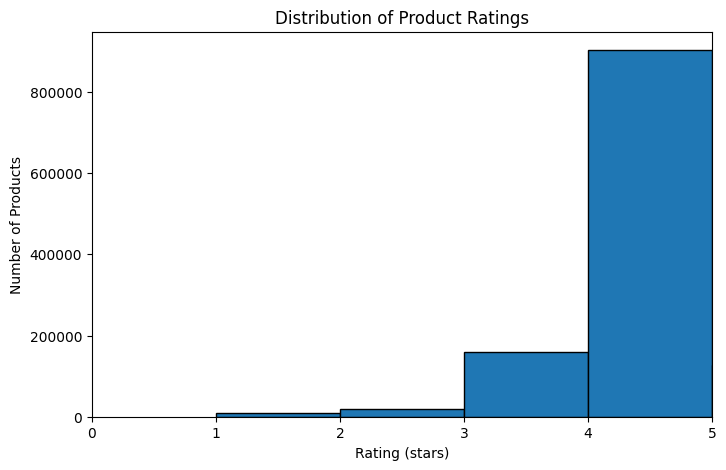

In [19]:
#Visualizations:

plt.figure(figsize=(8,5))
plt.hist(df['stars'], bins=range(1,7), edgecolor='black')
plt.xlim(0,5)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Number of Products')
plt.show()


## **Business-centric Report:**

### **Caterogy Analysis**

The category with the highest listing frequency is **Sports & Outdoors**, with 836.265 listings, which is significantly higher than any other category in the dataset.
The next highest categories — Beauty (19.312), Handmade Clothing, Shoes & Accessories (19.229), Bath & Body (19.092), and Birthday Gifts (18.978) — have a much lower listing count, all below 20,000.

This indicates that **Sports & Outdoors** is the most popular, representing roughly 34% of all listings in the dataset (836,265 out of 2,443,651 total).

### **Prices Analysis**

The average price point of the products is about $89.24, but the most common price (mode) is $9.99, and the median is $19.09.

This means that while a few expensive products push the average up, most items are actually much cheaper.

The data is therefore right-skewed (with a 27.5 of skewness) there are many low-priced products and a few high-priced outliers that increase the mean.

The max price value is  100000 that compared to the mode price is a huge outlier.

### **Rating Analysis**

Both the median and the mode are 0 which indicates that a large portion of the products have a rating of 0 stars (likely unrated products). 

This pulls the overall distribution heavily toward the lower end.

Most products either have no reviews or are rated extremely poorly.

At least 50% of the items have a rating of 0 (first two quartiles are 0).

Then the 3th quartile jumps to ~4.4, meaning that the upper half of rated products tend to have very high ratings.

A huge part of products have 0 rating (unrated).

A cluster of well-rated items near 4–5 stars.

The rating distribution is highly imbalanced. Due to the lack of customer reviews.